<a href="https://colab.research.google.com/github/Ghadi0Rashed/MASAR-Bootcamp/blob/main/Copy_of_Project_2ML(Mobile_Price).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part I

>Mobile Price Classification Project
```
Group members:
1-Mohammed Alqarni
2-Raghad Almahyawi
3-Rahaf Althiyabi
4-Ghadi Alsharani
5-Munirah Alalyani
Supervised by: Dania Alsahfy
```

```
A dataset called Mobile Price Classification contained 2000 Instances and 21 features.
Brief description: Data on mobile phones, including factors like Battery Power, Bluetooth, RAM, and Internal Memory.
Use: Clean and process data, explore correlations between features of a mobile phone and its selling price, and create visualizations to compare mobile phones and their selling price.

The source: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification

DataSet Description
-Battery power
Total energy a battery can store in one time measured in mAh
-Blue
Has bluetooth or not
-Clock_speed
speed at which microprocessor executes instructions
-Dual_sim
Has dual sim support or not
-Fc
Front Camera mega pixels
-Four_g
Has 4G or not
-Int_memory
Internal Memory in Gigabytes
-M_dep
Mobile Depth in cm
-Mobile_wt
Weight of mobile phone
-N_cores
Number of cores of processor
-Pc
Primary Camera mega pixels
-Px_height
Pixel Resolution Height
-Px_width
Pixel Resolution Width
-Ram
Random Access Memory in Mega Bytes
-Sc_h
Screen Height of mobile in cm
-Sc_w
Screen Width of mobile in cm
-Talk_time
longest time that a single battery charge will last when you are
-Three_g
Has 3G or not
-Touch_screen
Has touch screen or not
-Wifi
Has wifi or not
-*Price_range*
This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).
```

##Reading Dataset And Get Info

In [ ]:
url = 'https://filebin.net/1jdsmjv7ad0ymlaz/Mobile_Price_Classification_TRAIN.csv'
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Read data from CSV file
data = pd.read_csv(url)
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [ ]:
#The column
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

## 1- Data Cleaning

In [ ]:
#Check the null (missing values)
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
#Total of each culumn
data.sum()

battery_power    2477037.0
blue                 990.0
clock_speed         3044.5
dual_sim            1019.0
fc                  8619.0
four_g              1043.0
int_memory         64093.0
m_dep               1003.5
mobile_wt         280498.0
n_cores             9041.0
pc                 19833.0
px_height        1290216.0
px_width         2503031.0
ram              4248426.0
sc_h               24613.0
sc_w               11534.0
talk_time          22022.0
three_g             1523.0
touch_screen        1006.0
wifi                1014.0
price_range         3000.0
dtype: float64

In [ ]:
# Check Duplicated rows
data.duplicated().any()

False

In [ ]:
#Check for outliers (Five point summury) and Describe Numiric Data
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


```
# No outliers
```


In [ ]:
# Check for inconsistencies
print(data.value_counts())

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  mobile_wt  n_cores  pc  px_height  px_width  ram   sc_h  sc_w  talk_time  three_g  touch_screen  wifi  price_range
501            0     2.3          0         12  1       54          0.3    131        4        19  504        1089      2346  13    12    2          1        0             1     1              1
1494           0     1.9          0         2   1       47          0.4    129        2        9   207        1177      3202  13    1     14         1        0             0     3              1
1504           0     1.9          1         7   1       25          0.3    152        4        9   395        1853      1788  13    11    13         1        0             1     1              1
                     1.5          0         12  1       34          0.7    142        8        15  507        973       2806  7     2     7          1        0             1     2              1
1503           1     0.7      

### Correlation Matrix

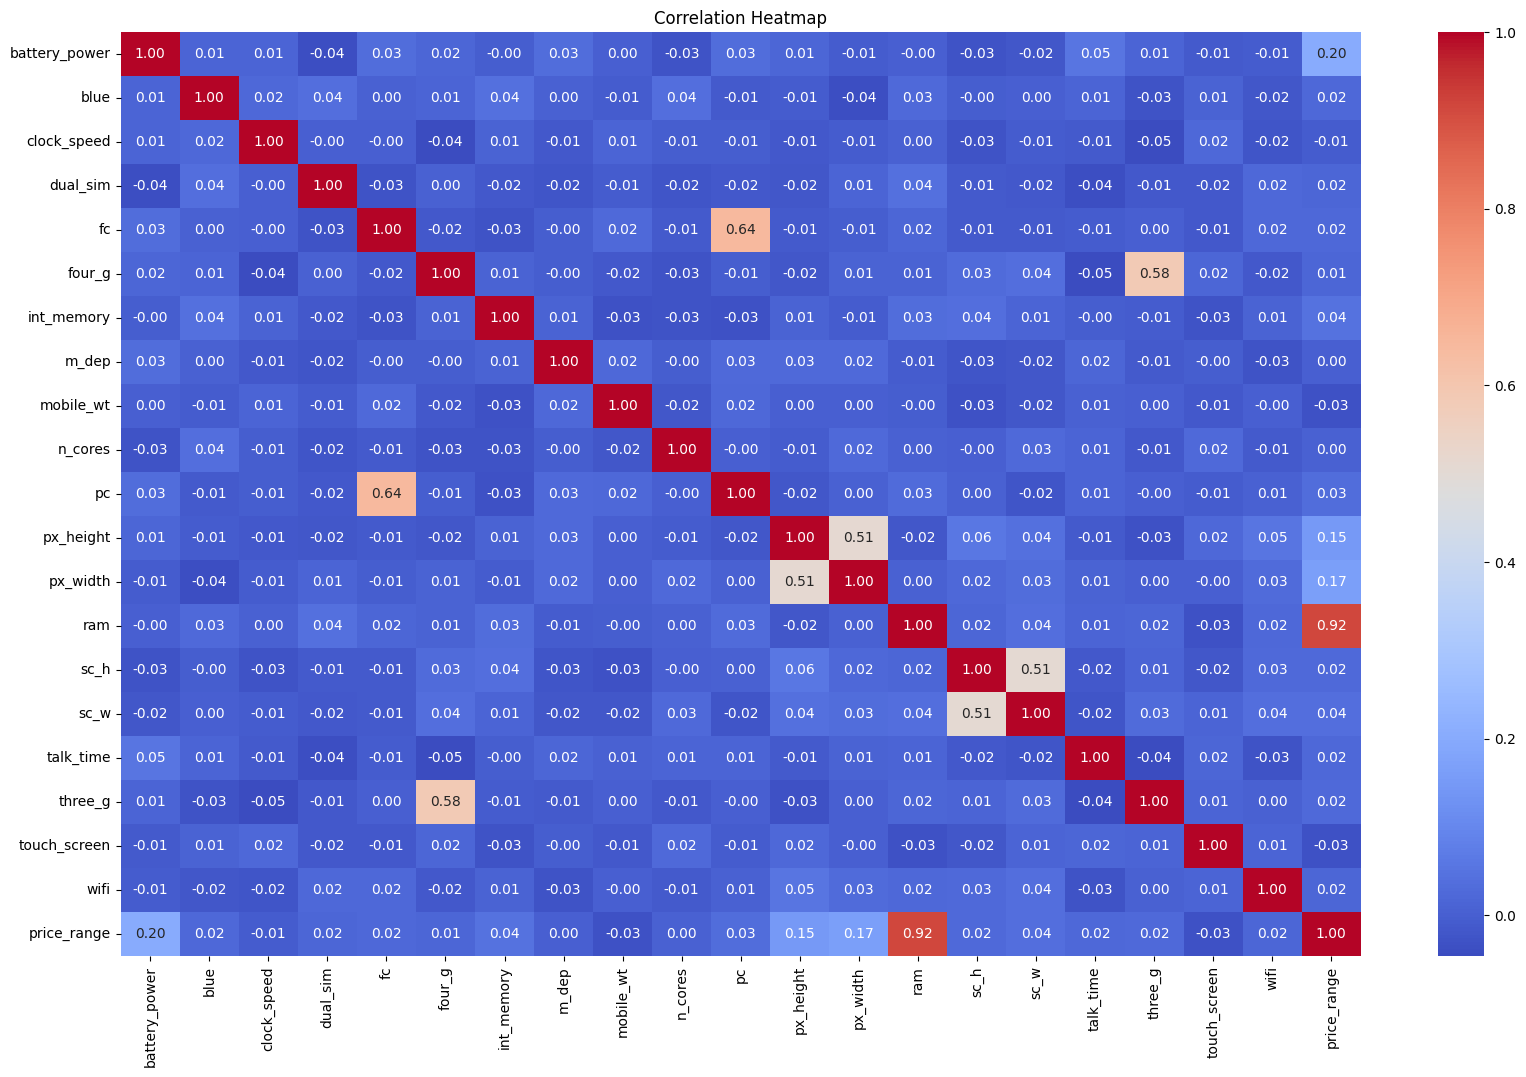

In [ ]:
# -1 to +1
# Heatmap using Seaborn
plt.figure(figsize=(20, 12))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


## 2- Data Processing

In [ ]:
#Check data types before Processing
data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

## 3- Data Visualization

### Scatterplot

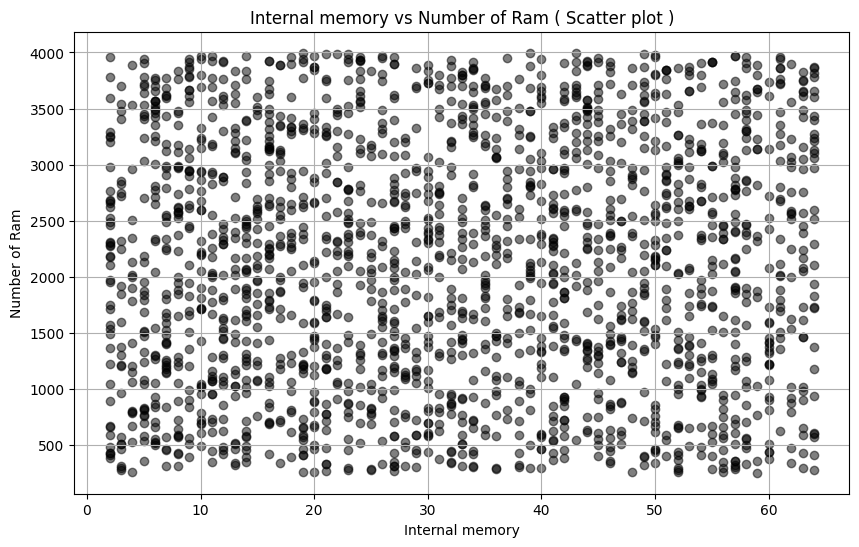

In [ ]:
#scatter plot for Internal memory vs Number of Ram
plt.figure(figsize=(10,6))
plt.scatter(data["int_memory"], data["ram"] , color = "black" , alpha = 0.5)
plt.xlabel("Internal memory")
plt.ylabel("Number of Ram")
plt.title("Internal memory vs Number of Ram ( Scatter plot )")
plt.grid(True)
plt.show()

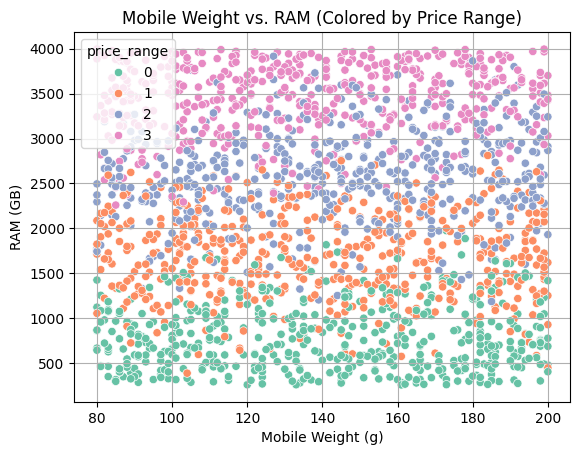

In [ ]:
sns.scatterplot(
    x="mobile_wt",
    y="ram",
    hue="price_range",
    palette="Set2",  # Adjust palette for your data
    data=data,
)
plt.xlabel("Mobile Weight (g)")
plt.ylabel("RAM (GB)")
plt.title("Mobile Weight vs. RAM (Colored by Price Range)")
plt.grid(True)
plt.show()


### Boxplot

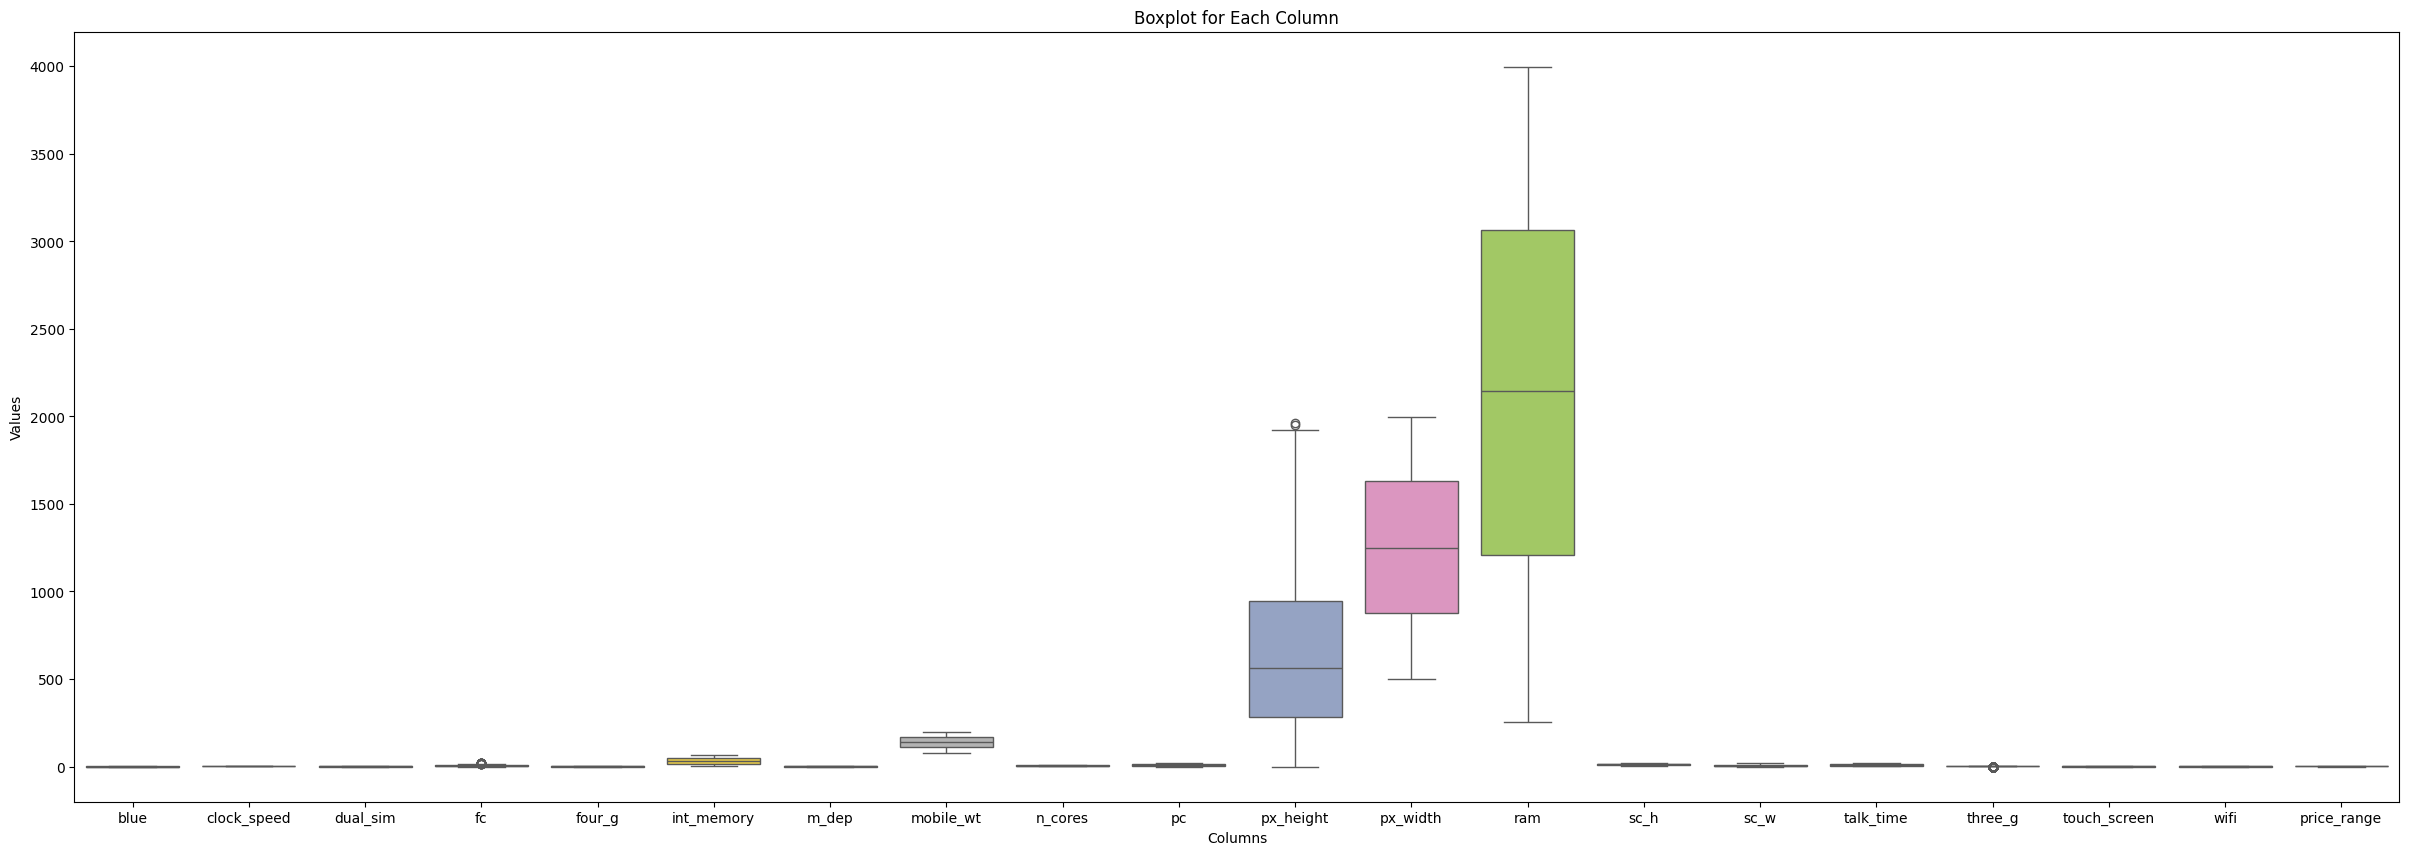

In [ ]:
#Set the matplotlib
plt.figure(figsize=(30, 10))
#Create boxplots for each column using seaborn
sns.boxplot(data=data.drop('battery_power', axis=1), orient='v', palette='Set2')
#Labels and title
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Boxplot for Each Column')
plt.show()

####Battery Power and Ram

In [ ]:
df_battery_price = data.groupby('price_range')['battery_power'].mean()

In [ ]:
from plotly.offline import iplot , plot
import plotly.express as px
iplot(px.line(df_battery_price,
              template='plotly_dark',
              labels={'value':'Mean of Battery Capacity','price_range':'Price Range'},
              color_discrete_sequence=['red']
              ))

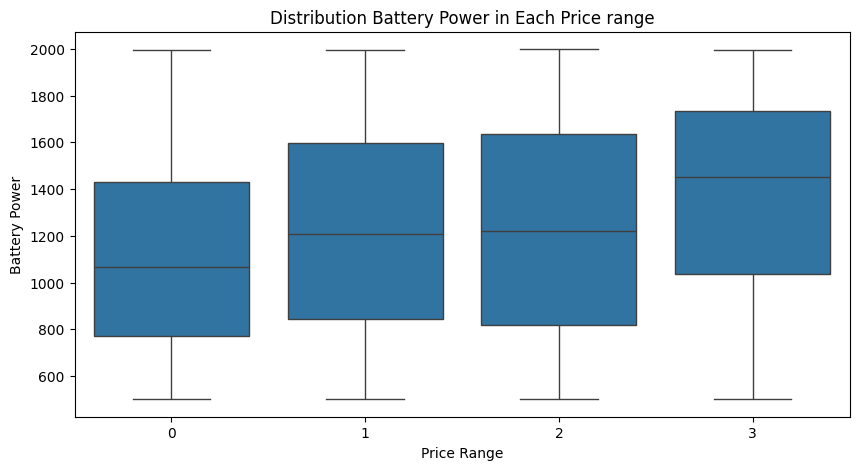

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Distribution Battery Power in Each Price range')
sns.boxplot(x=data['price_range'],y=data['battery_power'])
plt.xlabel('Price Range')
plt.ylabel('Battery Power')
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Distribution Size of Ram in Each Price range')
sns.boxplot(x=data['price_range'],y=data['ram'])
plt.xlabel('Price Range')
plt.ylabel('Ram')
plt.show()

<Axes: ylabel='battery_power'>

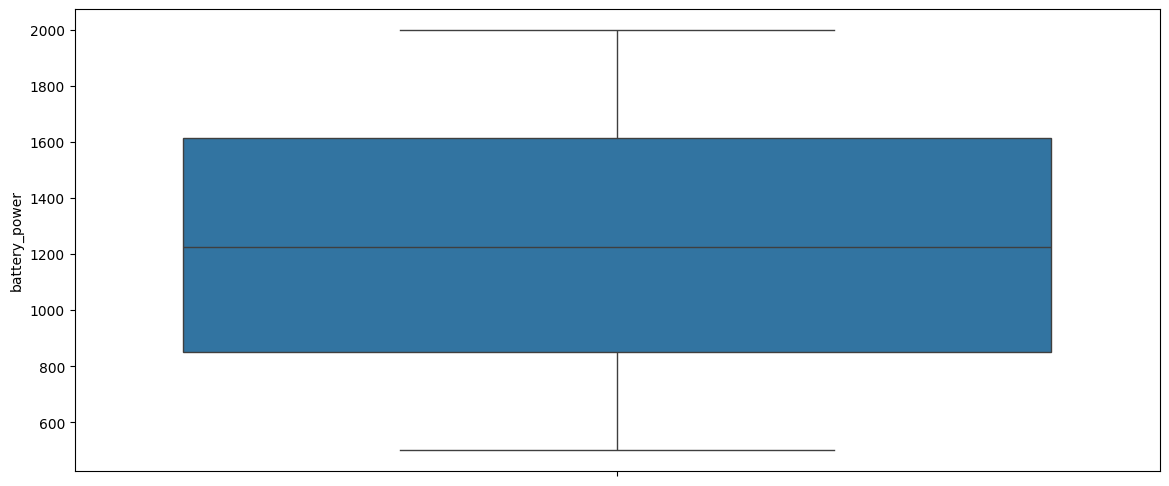

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(data.battery_power)

<Axes: xlabel='price_range', ylabel='ram'>

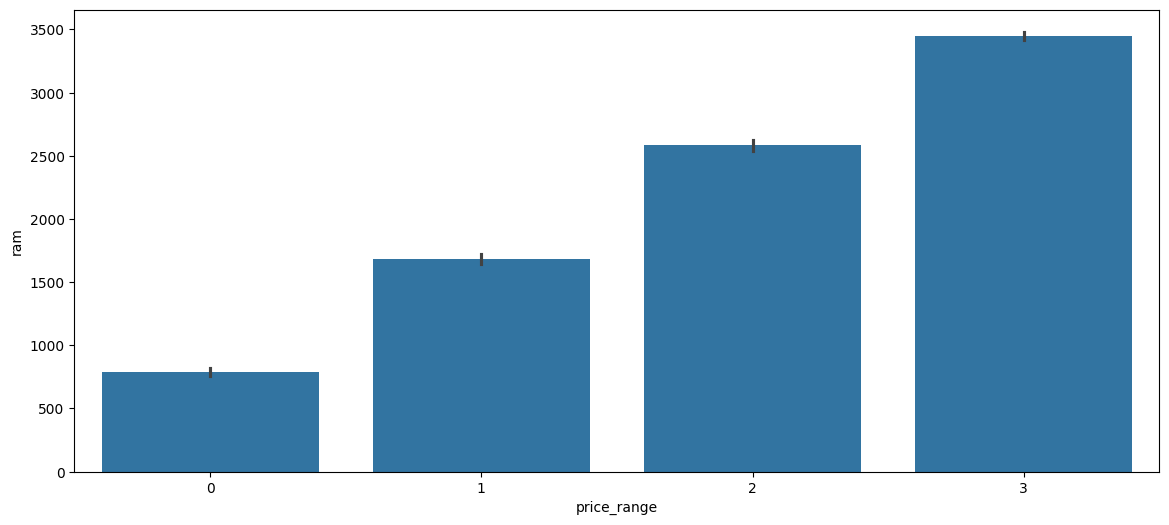

In [ ]:
plt.figure(figsize=(14,6))
sns.barplot(data = data ,x=data['price_range'],y = 'ram')

### 4G Support and 3G Support

In [ ]:
df_4g = data['four_g'].value_counts()
iplot(px.pie(values=df_4g,
             names=['Support 4G','Not Support 4G'],
             template='plotly_dark',
             title='Is Support 4G ?'
             ).update_traces(textinfo='label+percent'))

In [ ]:
df_3g = data['three_g'].value_counts()
iplot(px.pie(values=df_3g,
             names=['Support 3G','Not Support 3G'],
             template='plotly_dark',
             title='Is Support 3G ?'
             ).update_traces(textinfo='label+percent'))

In [ ]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Interactive plot using Plotly

###Pairplot for Multiple Comparisons

In [ ]:
import plotly.express as px
# Interactive plot using Plotly
fig = px.scatter(data, x='price_range', y='clock_speed', size='battery_power', color='n_cores',
                 hover_name='n_cores', log_x=True, size_max=60)
fig.update_layout(title='Interactive Scatter Plot: Price range, Clock speed, battery_power',
                  xaxis_title='Price range',
                  yaxis_title='speed at which microprocessor executes instructions',
                  coloraxis_colorbar_title='Number of cores of processor')
fig.show()

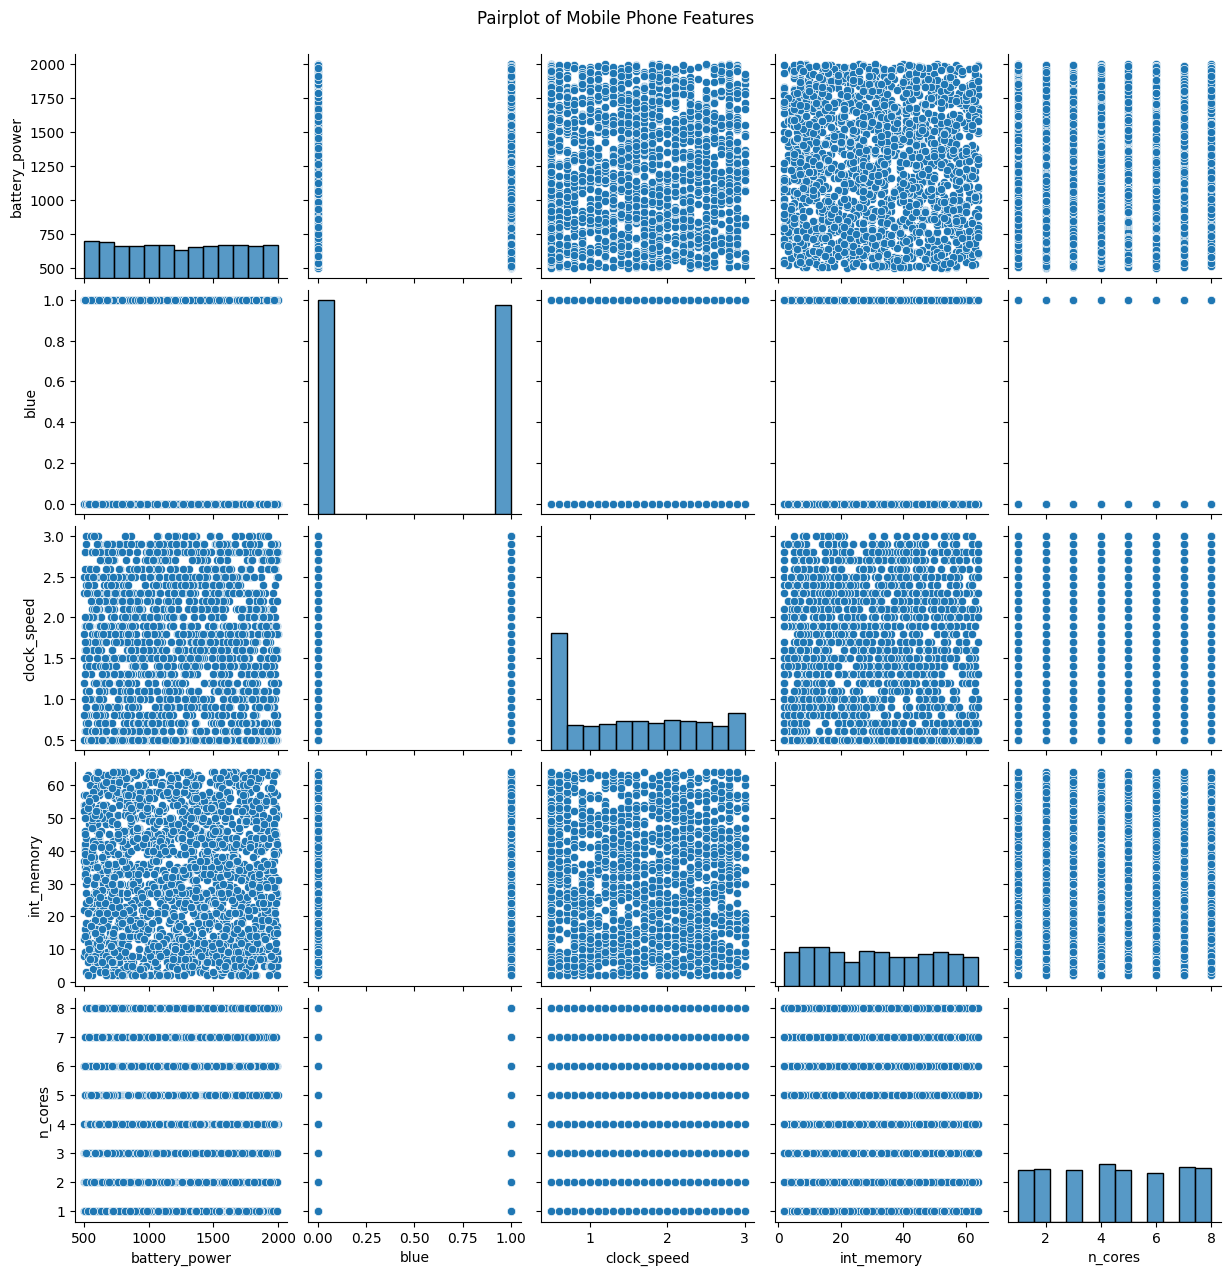

In [ ]:
# Create a pairplot for selected features
features = ['battery_power', 'blue', 'clock_speed', 'int_memory','n_cores']
sns.pairplot(data[features])
plt.suptitle('Pairplot of Mobile Phone Features', y=1.02)
plt.show()

### Plotting 3d plots

In [ ]:
import plotly.graph_objects as go
## defining a function for plotting 3d plots
def create_3d_plot(df, x_col, y_col, z_col):
    x_data = df[x_col]
    y_data = df[y_col]
    z_data = df[z_col]

    trace = go.Scatter3d (
        x = x_data,
        y = y_data,
        z = z_data,
        mode = 'markers',
        marker = dict(
            color = z_data,
            colorscale = [[0, 'red'], [0.33, 'blue'],[0.66, 'green'],[1, 'yellow']],
            cmin=0,
            cmax=3,
            colorbar = dict(thickness=10, title=z_col, len=0.8, tickvals=[0,1,2,3], ticktext=['0', '1' ,'2' , '3']),
            line = dict(color = 'rgb(255, 255, 255)'),
            opacity = 0.8
        ),
        hovertext = df.index,
        hoverinfo = 'text'
    )

    data = [trace]

    layout = go.Layout(
        title = dict(text = '3D Scatter Plot' , y = .95, x = 0.4, xanchor = 'center', yanchor = 'top', font = dict(size=24)),
        scene = dict(
            xaxis_title = x_col,
            yaxis_title = y_col,
            zaxis_title = z_col,
            xaxis=dict(gridcolor='red' , tickfont=dict(color='yellow')),
            yaxis=dict(gridcolor='blue' , tickfont=dict(color='yellow')),
            zaxis=dict(gridcolor='green' , tickfont=dict(color='yellow')),
        ),
        width = 1000,
        height = 800,
        margin = dict(r = 30, b = 10, l = 10, t = 10),
        paper_bgcolor='lightslategray',
    )

    fig = go.Figure(data = data, layout = layout)
    fig.show()

In [ ]:
create_3d_plot (data , 'ram' , 'int_memory' , 'price_range')

## 4- ML Model

### **Problem Statement:**
We do not have to predict actual price , but a price range indicating how high the price is

### Split Data

In [ ]:
#Data Processing
x=data.drop(['price_range'],axis=1)
y=data['price_range']# target

In [ ]:
#Scaling to a specific rang [0,1] using MinMax Scaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(scaled, columns = x.columns)
x_scaled


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.195725,1.0,0.00,1.0,0.000000,1.0,0.000000,0.777778,0.216667,0.714286,0.70,0.623469,0.927904,0.110102,0.571429,0.222222,0.944444,1.0,1.0,0.0
1996,0.977956,1.0,0.84,1.0,0.000000,0.0,0.596774,0.111111,0.891667,0.428571,0.15,0.466837,0.977971,0.474613,0.428571,0.555556,0.777778,1.0,1.0,1.0
1997,0.941884,0.0,0.16,1.0,0.052632,1.0,0.548387,0.666667,0.233333,1.000000,0.15,0.442857,0.755674,0.748530,0.285714,0.055556,0.166667,1.0,1.0,0.0
1998,0.675351,0.0,0.16,0.0,0.210526,1.0,0.709677,0.000000,0.541667,0.571429,0.25,0.171429,0.113485,0.163816,0.928571,0.555556,0.944444,1.0,1.0,1.0


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y, test_size= 0.2)

In [ ]:
print(f'Shape of X_Train {x_train.shape}')
print(f'Shape of X_Test {x_test.shape}')
print(f'Shape of Y_Train {y_train.shape}')
print(f'Shape of Y_Test {y_test.shape}')

Shape of X_Train (1600, 20)
Shape of X_Test (400, 20)
Shape of Y_Train (1600,)
Shape of Y_Test (400,)


### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Linear Regression model
lr = LinearRegression()

# Train the model
lr.fit(x_train,y_train)

# Make predictions on the test set
predictions = lr.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 0.27523347703305623
Mean Squared Error: 0.10611916708779191
R-squared: 0.9157633965686001


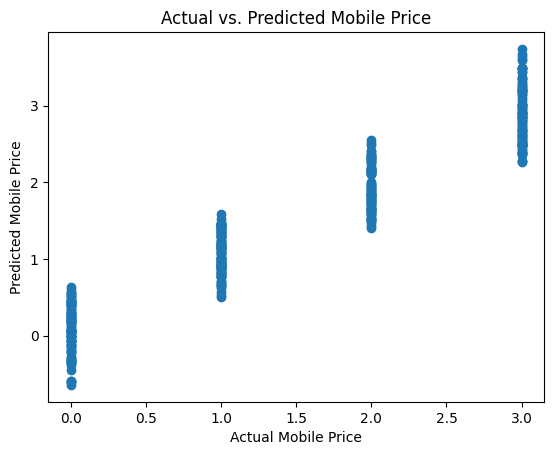

Linear Regression R^2 : 0.9157633965686001


In [ ]:
# Plot the predicted vs. actual values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Mobile Price')
plt.ylabel('Predicted Mobile Price')
plt.title('Actual vs. Predicted Mobile Price')
plt.show()
lr.fit(x_train , y_train)
print(f"Linear Regression R^2 : {lr.score(x_test , y_test)}")

### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
RF = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
RF.fit(x_train, y_train)

# Make predictions on the test set
predictions = RF.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 0.17919999999999997
Mean Squared Error: 0.0812095
R-squared: 0.9355365045345398


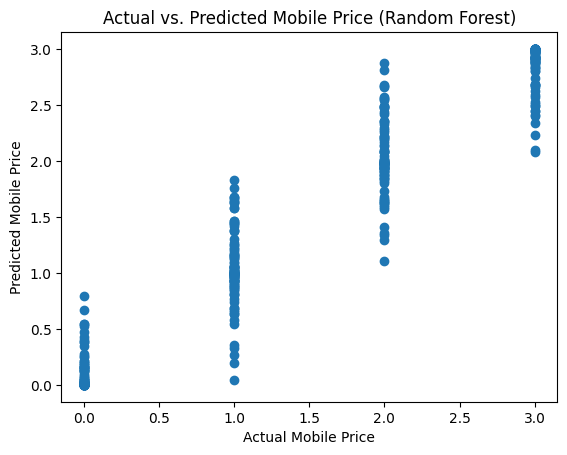

In [ ]:
# Plot the predicted vs. actual values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Mobile Price')
plt.ylabel('Predicted Mobile Price')
plt.title('Actual vs. Predicted Mobile Price (Random Forest)')
plt.show()

### Support Vector Regressor (SVR)

In [ ]:
from sklearn.svm import SVR

# Initialize the Support Vector Regressor model
model = SVR(kernel='linear')

# Train the model
model.fit(x_train, y_train)

# Make predictions on the scaled test set
predictions = model.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 0.2787902945478723
Mean Squared Error: 0.10869746462329395
R-squared: 0.9137167632130389


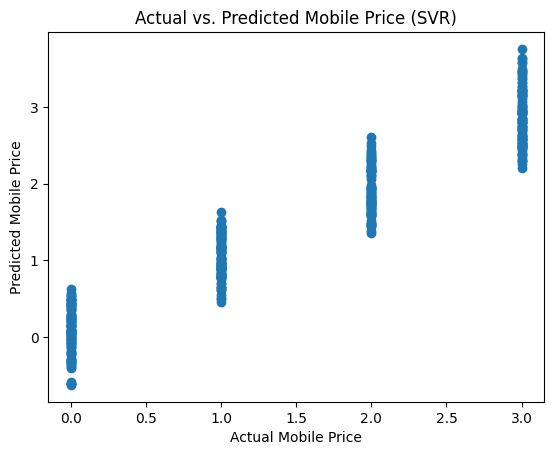

In [ ]:
# Plot the predicted vs. actual values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Mobile Price')
plt.ylabel('Predicted Mobile Price')
plt.title('Actual vs. Predicted Mobile Price (SVR)')
plt.show()

## Final result

In [ ]:
# Getting the model score
lr.score(x_test, y_test)

0.9157633965686001

In [ ]:
RF.score(x_test, y_test)

0.9355365045345398

In [ ]:
model.score(x_test, y_test)

0.9137167632130389

In [ ]:
model_dic={
    "Linear Regression":LinearRegression(),
    "Support Vector Regressor (SVR)":SVR(),
    "Random Forest Regressor":RandomForestRegressor(),

}
for model_n in model_dic.keys():
    model=model_dic[model_n]
    model.fit(x_train,y_train)
    score=model.score(x_test,y_test)
    print("======")
    print("Model:", model_n)
    print("Score:", score)
    print("train Score:", model.score(x_train,y_train))
    model.predict(x_test)



Model: Linear Regression
Score: 0.9157633965686001
train Score: 0.9191358786380711
Model: Support Vector Regressor (SVR)
Score: 0.9051539064728896
train Score: 0.9632536775687456
Model: Random Forest Regressor
Score: 0.9348754737949238
train Score: 0.9914769580318415


##BEST MODEL IS Random Forest MODEL

# Part II

## solve Q1

1. Loop:
Question:
Write a Python program that uses a 'for' loop to print all even numbers from 1 to 10. Then, use 'while' loop.

In [ ]:
# Python program to print Even Numbers in given range

 # solving by use for loop
# given range and read the varible from the user
start = int(input("Enter the start of range: "))
end = int(input(" end of range: "))

# Use a for loop to print the even numbersrom in given range
for num in range(start, end + 1):

    # checking condition
    if num % 2 == 0:
        print(num, end=" ")

        # solving by use  while loop
#Initialize a counter and read the varible from the user
x = int(input("Enter a number: "))
i = 1
# Use a while loop to print the even numbers from 1 to 10
while i <= x:
   # checking condition
    if i % 2 == 0:
        print(i, end=" ")
        # Increment the counter and update the even number
    i = i + 1

## solve Q2

2. Control Flows:
Question:
Create a Python function named grade_classifier that takes a student's score as an argument and returns a string indicating their grade. Use the following criteria:

Score >= 90: "A"
80 <= Score < 90: "B"
70 <= Score < 80: "C"
60 <= Score < 70: "D"
Score < 60: "F"

In [ ]:
# Create function grade_classifier

def grade_classifier(Score):
  if Score >= 90:
      return "A"
  elif 80 <= Score < 90:
      return "B"
  elif 70 <= Score < 80:
      return "C"
  elif 60 <= Score < 70:
      return "D"
  else:
      return "F"

student_score = 80
result = grade_classifier(student_score)
print(f"The student's grade is: {result}")



The student's grade is: B


## solve Q3

3. If Conditions:
Question:
Write a Python program that prompts the user to enter their age. Use if-elif-else statements to categorize and print the user's age group as follows:

If the age is less than 13, print "Child."
If the age is between 13 and 19 (inclusive), print "Teenager."
If the age is between 20 and 59 (inclusive), print "Adult."
If the age is 60 or older, print "Senior Citizen."

In [ ]:
def age_classifier(age):
  if age >= 60:
    return "senior citizen"
  elif 20 <= age <= 59:
    return "adult"
  elif 13 <= age <= 19:
    return " teenager"
  else:
    return "child"


age = int(input("enter your age: "))
result = age_classifier(age)
print(f"the user's age group is: {result}")

## solve Q4

4. Functions:
Question:
Define a Python function named multiply_numbers that takes two parameters (num1 and num2) and returns their product. Test the function with values 5 and 7.
5 * 7 = 35

In [ ]:
#creat function multiply_numbers
def multiply_numbers(num1, num2):
  return num1 * num2

#test the function with values 5 and 7
multiply_numbers (5,7)

## solve Q5

5. Combine All the Above:
Question:
Write a Python program that does the following:

Prompts the user to enter a number (user_num).
Uses a loop to print all numbers from 1 to user_num (inclusive) that are divisible by 3.
Calls the grade_classifier function to classify a user's score (you can use a predefined score for testing).
Prints a message indicating whether the classified grade is satisfactory or not.

In [ ]:
# Prompt the user to enter their age
user_num = int(input("Enter a number: "))

# Use a loop to print numbers divisible by 3 from 1 to user_num
print(f"Numbers divisible by 3 from 1 to {user_num}:")
for num in range(1, user_num + 1):
    if num % 3 == 0:
        print(num)

# Call the grade_classifier function with a predefined score for testing
test_score = 98
classified_grade = grade_classifier(test_score)

# Print a message indicating whether the classified grade is satisfactory or not
if classified_grade in ['A', 'B', 'C']:
    print(f"The classified grade ({classified_grade}) is satisfactory.")
else:
    print(f"The classified grade ({classified_grade}) is not satisfactory.")